# Setup

In [1]:
import glob
import pandas as pd

In [2]:
import calendar
import datetime
from datetime import timedelta

def get_range_of_week(year, calendar_week):       
    monday = datetime.datetime.strptime(f'{year}-{calendar_week}-1', "%Y-%W-%w").date()
    return pd.Series([str(monday), str(monday + datetime.timedelta(days=6.9))], index=['week_start', 'week_end'])

# Load all files

In [3]:
list_of_files = glob.glob('../data//archive/*_variants_of_concern_sample.csv')

In [4]:
list_of_files

['../data//archive\\2021-05-12_variants_of_concern_sample.csv',
 '../data//archive\\2021-05-19_variants_of_concern_sample.csv',
 '../data//archive\\2021-05-26_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-02_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-09_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-16_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-23_variants_of_concern_sample.csv',
 '../data//archive\\2021-06-30_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-07_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-14_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-22_variants_of_concern_sample.csv',
 '../data//archive\\2021-07-29_variants_of_concern_sample.csv']

In [5]:
dates = [f.split('\\')[1].split('_')[0] for f in list_of_files]

Load each file and add date of availability as column

In [6]:
df_all = pd.DataFrame()

for i, d in enumerate(dates):
    df = pd.read_csv(list_of_files[i])
    df['seq_available'] = d
    df_all = df_all.append(df, ignore_index=True)

# Data preparation

In [7]:
df_all.drop(columns=['total_count', 'total_proportion'], inplace=True)

In [8]:
# df_all['max_count'] = df_all[[c for c in df_all.columns if 'count' in c]].max(axis=1)
# df_all['max_proportion'] = df_all[[c for c in df_all.columns if 'proportion' in c]].max(axis=1)

# df_all['total_count'] = round(100*df_all.max_count / df_all.max_proportion).astype(int)

# df_all.drop(columns=['max_count', 'max_proportion'], inplace=True)

Get start and end date of the given weeks

In [9]:
df_all = df_all.join(df_all.apply(lambda x: get_range_of_week(2021, x['week']), axis=1))

Reorder columns

In [10]:
df_all = df_all[['seq_available', 'week', 'week_start', 'week_end', 'B.1.1.7_count', 'B.1.1.7_proportion', 'B.1.351_count',
       'B.1.351_proportion', 'B.1.617.1_count', 'B.1.617.1_proportion',
       'B.1.617.2_count', 'B.1.617.2_proportion', 'P.1_count',
       'P.1_proportion']]

In [11]:
df_all.tail()

,seq_available,week,week_start,week_end,B.1.1.7_count,B.1.1.7_proportion,B.1.351_count,B.1.351_proportion,B.1.617.1_count,B.1.617.1_proportion,B.1.617.2_count,B.1.617.2_proportion,P.1_count,P.1_proportion
265,2021-07-29,24,2021-06-14,2021-06-20,552,52.5,11,1.0,NaN,NaN,414,39.4,14,1.3
266,2021-07-29,25,2021-06-21,2021-06-27,245,32.5,3,0.4,NaN,NaN,451,59.9,7,0.9
267,2021-07-29,26,2021-06-28,2021-07-04,156,18.9,1,0.1,NaN,NaN,631,76.5,15,1.8
268,2021-07-29,27,2021-07-05,2021-07-11,76,10.1,1,0.1,NaN,NaN,643,85.7,15,2.0
269,2021-07-29,28,2021-07-12,2021-07-18,34,6.0,0,0.0,NaN,NaN,521,91.4,9,1.6


# Export

In [12]:
df_all.to_csv('../data/sequencing_germany.csv'.format(df_all.seq_available.max()), index=False)

# Plot

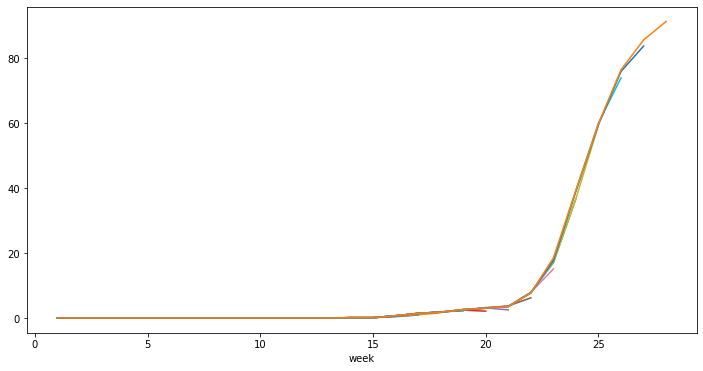

In [13]:
df_all.set_index('week').groupby(['seq_available'])['B.1.617.2_proportion'].plot(figsize=[12, 6]);